## 4.4　勾配

In [1]:
import os
import sys
import numpy as np
import matplotlib.pylab as plt

すべての変数の偏微分をベクトルとしてまとめたものを勾配（gradient）という。

In [2]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
    
        x[idx] = tmp_val - h
        fxh2 = f(x)
    
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

np.zeros_like(x) は、x と同じ形状の配列で、その要素がすべて 0 の配列を生成している。

In [3]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [4]:
print(_numerical_gradient_no_batch(function_2, np.array([3.0, 4.0])))
print(_numerical_gradient_no_batch(function_2, np.array([0.0, 2.0])))
print(_numerical_gradient_no_batch(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


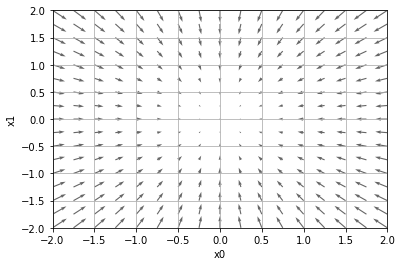

In [5]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
    
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

勾配が示す方向は、各場所において**関数の値を最も減らす方向**である。

### 4.4.1　勾配法

最適なパラメータというのは、損失関数が最小値を取る時のパラメータの値である。<br>
勾配は、各地点において関数の値を最も減らす方向を示すため、勾配の指す先が最小値であるかは分からない。

勾配法は、現在の場所から勾配方向に一定の距離だけ進み、移動した先でも勾配を求め、その勾配方向へ進むということを繰り返す。<br>
これにより関数の値を徐々に減らすのが、**勾配法**（gradient method）である。

勾配法は、最小値を探す場合は**勾配降下方**、最大値を探す場合には**勾配上昇法**という。<br>
ただし、符号を反転させれば同じことであるので、両者の違いはさほど重要ではない。

In [6]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
    
        x[idx] = tmp_val - h
        fxh2 = f(x)
    
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [7]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [8]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [9]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-6.11110793e-10  8.14814391e-10]
[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


勾配法による更新のプロセスをプロットする。

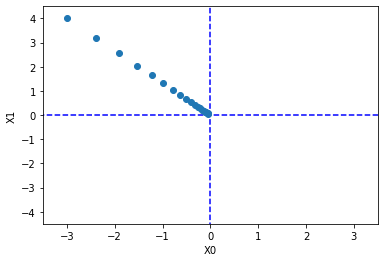

In [10]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

学習率のような人の手によって設定されるパラメータは、**ハイパーパラメータ**という。

### 4.4.2　ニューラルネットワークに対する勾配

In [11]:
os.getcwd()

'/Users/yuta.shimizu/Downloads/ML'

In [12]:
os.chdir('/Users/yuta.shimizu/Downloads/ML/deep-learning-from-scratch-master/ch01')
os.getcwd()

'/Users/yuta.shimizu/Downloads/ML/deep-learning-from-scratch-master/ch01'

In [13]:
sys.path.append(os.pardir)

In [14]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [15]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [16]:
net = simpleNet()
print(net.W)

[[-1.49112443 -0.03374551 -0.22374212]
 [ 1.06504325 -0.64521507 -0.17425056]]


$ (1 \times 2) \times (2 \times 3) $ なので、計算結果は $ (1\times 3) $ となる。

In [17]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

[ 0.06386427 -0.60094087 -0.29107078]
0


In [18]:
t = np.array([0, 0, 1])
net.loss(x, t)

1.150454699413681

関数 f を作成し、それを numerical_gradient に渡す。

In [19]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.27080781  0.13929643 -0.41010423]
 [ 0.40621171  0.20894464 -0.61515635]]


In [23]:
f = lambda w: net.loss(x, t)
dw = numerical_gradient(f, net.W)
print(dW)

[[ 0.27080781  0.13929643 -0.41010423]
 [ 0.40621171  0.20894464 -0.61515635]]


class の基礎について復習しておく。

In [20]:
class Myproduct:
    def __init__(self, name, price):
        self.name = name
        self.price = price
        self.stock = 30
        self.sales = 25

product1 = Myproduct('cake', 500)

print(product1.name)
print(product1.price)
print(product1.stock)
print(product1.sales)

cake
500
30
25
